# Simulation of atmospheric transparency at OHP
- author : Sylvie Dagoret-Campagne
- affiliation : LAL/IN2P3/CNRS
- date : October 19th 2018

The goal is to simulate vertical transparency at OHP  :
- according data in MERRA2
- libradtran as light transport code


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import sys
import os
from astropy.io import fits
import numpy as np
import pandas as pd

In [3]:
import matplotlib.colors as colors
import matplotlib.cm as cmx

In [4]:
from astropy.io import fits

In [5]:
import libsimulateTranspOHPScattAbsAer as atmsim

In [6]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (14, 10),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

# Configuration

## airmass

In [7]:
z_airmass=1.0

In [8]:
all_airmass=np.array([1.0, 1.1, 1.2, 1.3, 1.4, 1.5,1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.5])

In [9]:
NBSIMU=all_airmass.shape[0]

## Seasons

In [10]:
YEARSTR="2018"

### Winter

In [11]:
pwv_w=10.2
o3_w=370.1
P_w=932.8
aer_w=0

### Summer

In [12]:
pwv_s=25.1
o3_s=318.1
P_s=938.9
aer_s=0

# Single simulation

In [13]:
path,file=atmsim.ProcessSimulationaer(z_airmass,pwv_w,o3_w,aer_w,P_w,'mw') 

In [14]:
fullfilename=os.path.join(path,file)

In [15]:
data=np.loadtxt(fullfilename)

In [16]:
wl_w=data[:,0]

In [17]:
WL=wl_w
NB_atm_DATA=len(WL)

In [18]:
atm_w=data[:,1]

In [19]:
path,file=atmsim.ProcessSimulationaer(z_airmass,pwv_s,o3_s,aer_s,P_s,'ms') 

In [20]:
fullfilename=os.path.join(path,file)

In [21]:
data=np.loadtxt(fullfilename)

In [22]:
wl_s=data[:,0]

In [23]:
WL=wl_s
NB_atm_DATA=len(WL)

In [24]:
atm_s=data[:,1]

## Atmospheric transparency

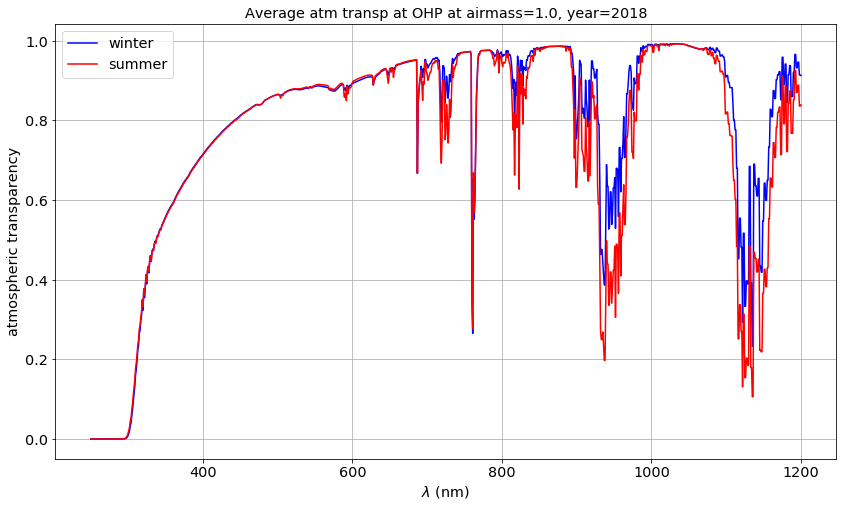

In [25]:
title="Average atm transp at OHP at airmass={}, year={}".format(z_airmass,YEARSTR)
figname="atm_transp_ohp_ws_am_{}_y_{}.png".format(int(z_airmass*10),YEARSTR)
plt.figure(figsize=(14,8))
plt.plot(wl_w,atm_w,'b-',label="winter")
plt.plot(wl_s,atm_s,'r-',label="summer")
plt.xlabel("$\lambda$ (nm)")
plt.ylabel("atmospheric transparency")
plt.grid()
plt.legend()
plt.title(title)
plt.savefig(figname)

## Atmospheric transparency ratio

/Users/dagoret/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in divide
  after removing the cwd from sys.path.


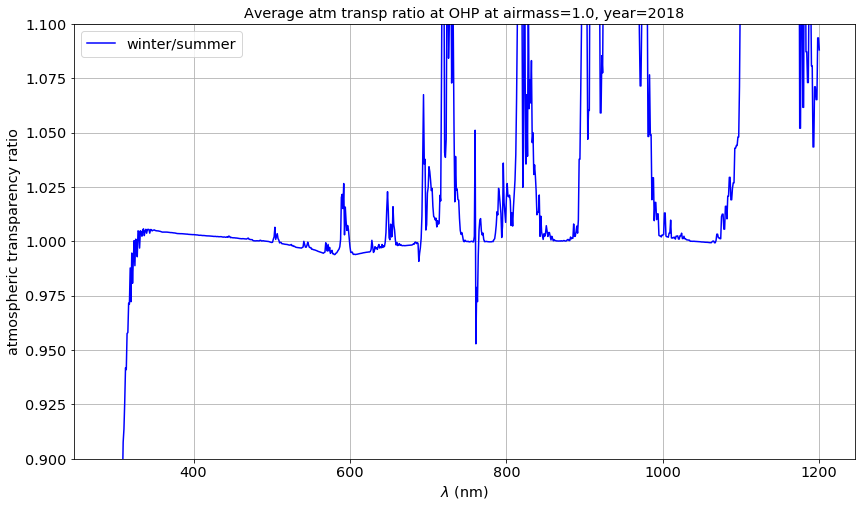

In [26]:
title="Average atm transp ratio at OHP at airmass={}, year={}".format(z_airmass,YEARSTR)
figname="atm_transp_ratio_ohp_ws_am_{}_y_{}.png".format(int(z_airmass*10),YEARSTR)
plt.figure(figsize=(14,8))
plt.plot(wl_w,atm_w/atm_s,'b-',label="winter/summer")
plt.xlabel("$\lambda$ (nm)")
plt.ylabel("atmospheric transparency ratio")
plt.grid()
plt.legend()
plt.title(title)
plt.ylim(0.9,1.1)
plt.savefig(figname)

# Many simulations

In [27]:
jet = cm = plt.get_cmap('jet')
cNorm  = colors.Normalize(vmin=0, vmax=NBSIMU)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)

In [28]:
atm_summer=np.zeros((NB_atm_DATA,NBSIMU+1))
atm_winter=np.zeros((NB_atm_DATA,NBSIMU+1))

In [29]:
atm_summer[:,0]=np.copy(WL)
atm_winter[:,0]=np.copy(WL)

In [30]:
for idx in np.arange(NBSIMU):
    airmass=all_airmass[idx]
    path,file=atmsim.ProcessSimulationaer(airmass,pwv_w,o3_w,aer_w,P_w,'mw') 
    #path,file=atmsim.ProcessSimulationaer(airmass,pwv_w,0,aer_w,P_w,'mw') 
    fullfilename=os.path.join(path,file)
    data=np.loadtxt(fullfilename)
    atm_winter[:,idx+1]=data[:,1]
    path,file=atmsim.ProcessSimulationaer(airmass,pwv_s,o3_s,aer_s,P_s,'ms')
    #path,file=atmsim.ProcessSimulationaer(airmass,pwv_s,0,aer_s,P_s,'ms')
    fullfilename=os.path.join(path,file)
    data=np.loadtxt(fullfilename)
    atm_summer[:,idx+1]=data[:,1]
    

# Plot

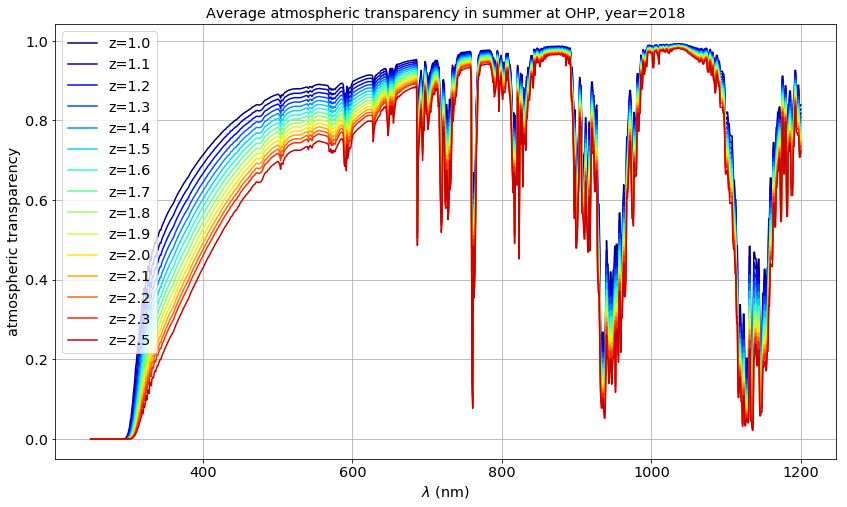

In [31]:
title="Average atmospheric transparency in summer at OHP, year={}".format(YEARSTR)
figname="atm_transp_ohp_summer_allam_y_{}.png".format(YEARSTR)
plt.figure(figsize=(14,8))
for idx in np.arange(NBSIMU):    
    colorVal = scalarMap.to_rgba(idx)
    thelabel="z={:2.1f}".format(all_airmass[idx])
    plt.plot(atm_summer[:,0],atm_summer[:,idx+1],color=colorVal,label=thelabel)
plt.grid(True)
plt.title(title)
plt.xlabel("$\lambda$ (nm)")
plt.ylabel("atmospheric transparency")
plt.legend(loc='best')
plt.savefig(figname)

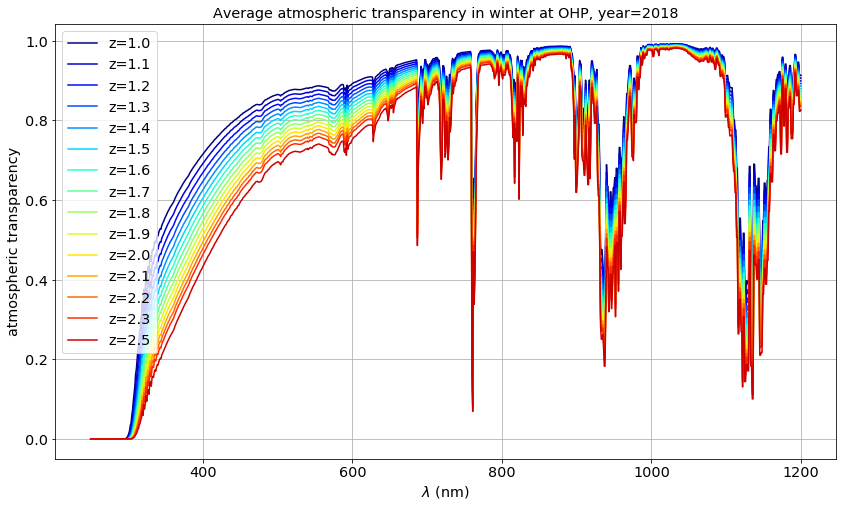

In [32]:
title="Average atmospheric transparency in winter at OHP, year={}".format(YEARSTR)
figname="atm_transp_ohp_winter_allam_y_{}.png".format(YEARSTR)
plt.figure(figsize=(14,8))
for idx in np.arange(NBSIMU):    
    colorVal = scalarMap.to_rgba(idx)
    thelabel="z={:2.1f}".format(all_airmass[idx])
    plt.plot(atm_winter[:,0],atm_winter[:,idx+1],color=colorVal,label=thelabel)
plt.grid(True)
plt.title(title)
plt.xlabel("$\lambda$ (nm)")
plt.ylabel("atmospheric transparency")
plt.legend(loc='upper left')
plt.savefig(figname)

/Users/dagoret/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in divide
  import sys


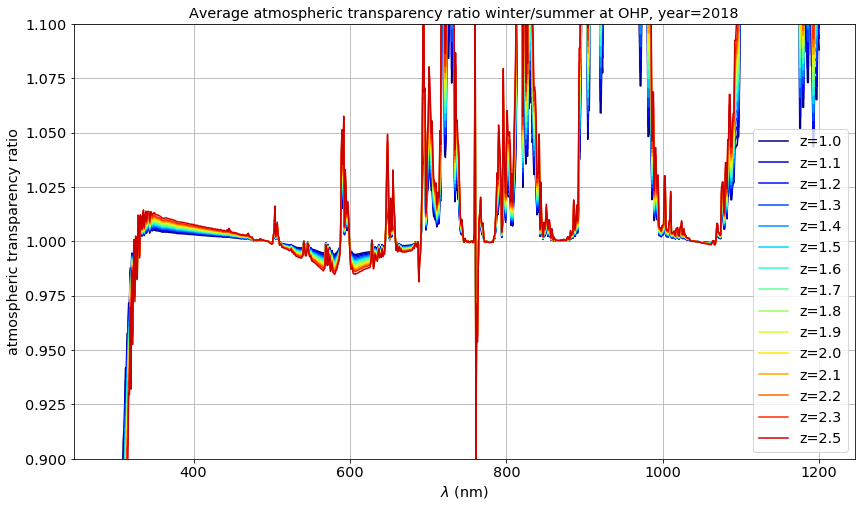

In [33]:
title="Average atmospheric transparency ratio winter/summer at OHP, year={}".format(YEARSTR)
figname="atm_transp_ratio_ohp_wintdivsum_allam_y_{}_1.png".format(YEARSTR)
plt.figure(figsize=(14,8))
for idx in np.arange(NBSIMU):    
    colorVal = scalarMap.to_rgba(idx)
    thelabel="z={:2.1f}".format(all_airmass[idx])
    plt.plot(atm_winter[:,0],atm_winter[:,idx+1]/atm_summer[:,idx+1],color=colorVal,label=thelabel)
plt.grid(True)
plt.title(title)
plt.xlabel("$\lambda$ (nm)")
plt.ylabel("atmospheric transparency ratio")
plt.legend(loc='lower right')
plt.ylim(0.9,1.1)
plt.savefig(figname)

/Users/dagoret/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in divide
  import sys


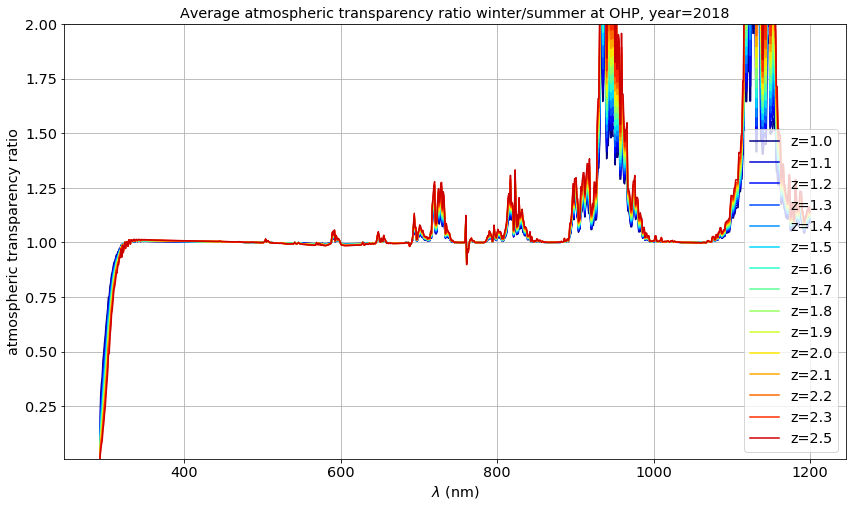

In [34]:
title="Average atmospheric transparency ratio winter/summer at OHP, year={}".format(YEARSTR)
figname="atm_transp_ratio_ohp_wintdivsum_allam_y_{}_2.png".format(YEARSTR)
plt.figure(figsize=(14,8))
for idx in np.arange(NBSIMU):    
    colorVal = scalarMap.to_rgba(idx)
    thelabel="z={:2.1f}".format(all_airmass[idx])
    plt.plot(atm_winter[:,0],atm_winter[:,idx+1]/atm_summer[:,idx+1],color=colorVal,label=thelabel)
plt.grid(True)
plt.title(title)
plt.xlabel("$\lambda$ (nm)")
plt.ylabel("atmospheric transparency ratio")
plt.legend(loc='lower right')
plt.ylim(0.01,2)
plt.savefig(figname)

# Save files

In [35]:
filename_winter="airtransp_ohp_winter.txt"
filename_summer="airtransp_ohp_summer.txt"

In [36]:
header_w="Air transparency at OHP winter simulated by libradtran \n"
header_s="Air transparency at OHP summer simulated by libradtran \n"

In [37]:
all_airmass_str=np.array2string(all_airmass)
comments = ' wavelength_nm , airmass = '+ all_airmass_str

In [38]:
comments

' wavelength_nm , airmass = [ 1.   1.1  1.2  1.3  1.4  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.5]'

In [39]:
fullheader_w=header_w+comments
fullheader_s=header_s+comments

In [40]:
fullheader_w

'Air transparency at OHP winter simulated by libradtran \n wavelength_nm , airmass = [ 1.   1.1  1.2  1.3  1.4  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.5]'

In [41]:
np.savetxt(filename_winter,atm_winter,fmt='%1.4f',header=fullheader_w)
np.savetxt(filename_summer,atm_summer,fmt='%1.4f',header=fullheader_s)